# Filter Method : 특정 기준으로 필터링
- statistics : 통계적 방법론 (Correlation / Chi-squre /...)
- Feature Importance : 중요도 값 기준 (Information / Feature Importance / Boruta)

:  변수 선별의 개념으로, Y를 판별하는데 무의미하다고 판단되는 변수를 제거

    ex) Feature importance가 낮은 변수, 제거
    ex) chi-square test 통해, Y 판별력이 없는 변수 제거
    
:  제거 기준의 조정에 따라, 몇 개의 변수를 남길지(변수 제거율) 컨트롤 일부 가능
:  변수 선택의 결과물이 최종 채택 변수는 아님  

#단일 변수 선택

- 카이스퀘어 검정 통계값
- F검정 통계값
- 상호정보량(mutual information)
- Information Value(보통 실제 프로젝트할때 많이 쓰는 변수)
- correlation coefficient

각각의 독립변수를 하나만 사용한 예측모형의 성능을 이용하여 가장 분류성능 혹은 상관관계가 높은 변수만 선택하는 방법이다.

사이킷런 패키지의 feature_selection 서브패키지는 다음 성능지표를 제공한다.

카이제곱 검정 통계값 : chi2
분산분석(ANOVA) F검정 통계값 : f_classif
상호정보량(mutual information) : mutual_info_classif

하지만 단일 변수의 성능이 높은 특징만 모았을 때 전체 성능이 반드시 향상된다는 보장은 없다.
feature_selection 서브패키지는 성능이 좋은 변수만 사용하는 전처리기인 SelectKBest 클래스도 제공한다.

Information Value 예측력
- 0~0.02 무의미
- 0.02~0.1 낮은 예측
- 0.1~0.3 중간 예측
- 0.3~0.5 강한 예측
- 0.5~1 너무 강한 예측(의심되는 수치)


SelectKBest(score_func=<function f_classif>, *, k=10)
- 고정된 k개의 특성을 선택하는 것
- score_func:기본값은 f_classif(이 기본값은 분류 기능에서 사용하가능하다)
- (여기에 들어갈 수 있는 값들이 앞에서 언급한 chi2,mutal_info_classif 등등이다)
- k: 말 그대로 k개의 특성을 선택하는 것

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df=pd.read_csv('creditcard.csv')
display(card_df.head(5))
display(card_df.shape)
display(card_df.columns)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# 훈련과 테스트 데이터로 분리

In [206]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy=get_preprocessed_df(df)
    X_features=df_copy.iloc[:,:-1]
    y_target=df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=0,stratify=y_target)
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


# feature importance 시각화

In [207]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def get_model_train_eval(model, feature_train=None, feature_test=None, target_train=None, target_test=None):
    # 모델 생성 및 학습/예측/평가 함수 정의
    model.fit(feature_train, target_train)
    pred=model.predict(feature_test)
    pred_proba=model.predict_proba(feature_test)[:,1]
    
    # 분류모델 평가 함수 정의
    confusion=confusion_matrix(target_test,pred)         # 오차행렬
    accuracy=accuracy_score(target_test,pred)            # 정확도
    precision=precision_score(target_test,pred)          # 정밀도
    recall=recall_score(target_test,pred)                # 재현율
    f1=f1_score(target_test,pred)                        # F1 스코어
    roc_auc=roc_auc_score(target_test,pred_proba)        # auc 스코어
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [208]:
#이상치 제거 전
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
# LGBMClassifier 모델 : 불균형 레이블 데이터일 경우 boost_from_average=False 설정

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)


로지스틱 회귀 성능
정확도: 0.9991, 정밀도: 0.8641, 재현율: 0.6014, F1: 0.7092, AUC: 0.9571
LightGBM 성능
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

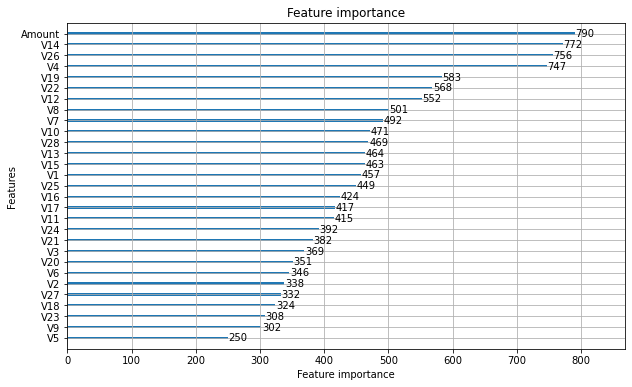

In [209]:
# 피처 중요도 시각화
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(lgbm_clf, ax=ax)


# 상관관계(Corr) - 이상치 제거

<AxesSubplot:>

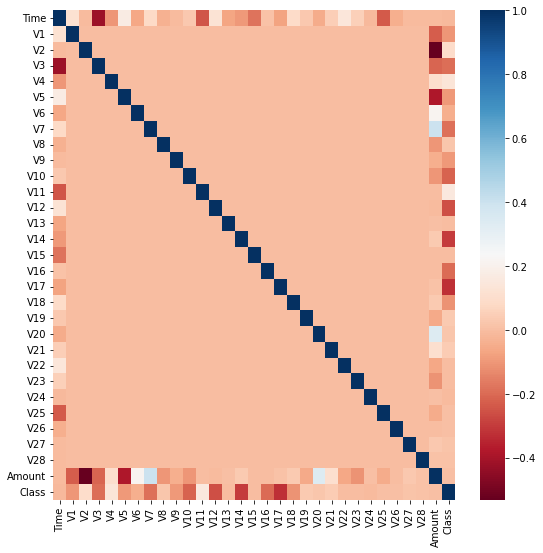

In [210]:
#이상치를 제거(target값과 가장 상관성이 높은 피처들을 위주로)

import seaborn as sns

plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')

### - Corr 결과 : class와 음의 상관관계가 가장 높은 피처인 V14와 V17에 대해서 이상치 검출 및 제거

# V14, V17 산포도

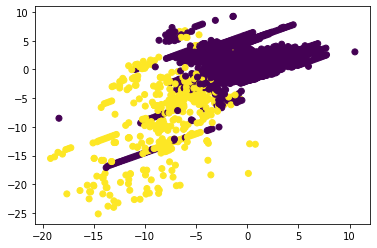

In [211]:
# V14, V17 산포도

import numpy as np
import matplotlib.pyplot as plt


plt.scatter(card_df['V14'],card_df['V17'],c=card_df.iloc[:,-1])
plt.show()

Text(0.5, 1.0, 'V17 vs Class')

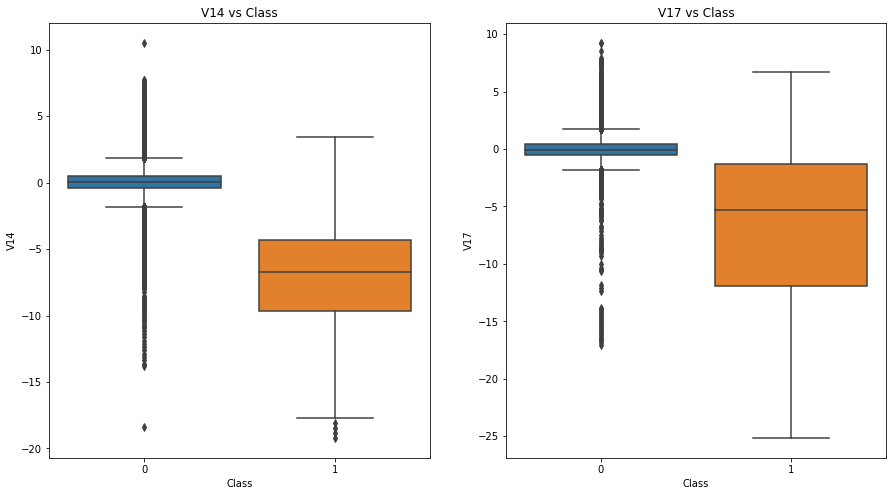

In [212]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x="Class", y="V14", data=card_df, ax=axes[0])
axes[0].set_title('V14 vs Class')

sns.boxplot(x="Class", y="V17", data=card_df, ax=axes[1])
axes[1].set_title('V17 vs Class')

### - Box plot 결과 - V14와 V17에서 target이 0, 1에 있어서  서로 다른 분포를 보여줌 -> 0과 1을 구분하는 중요한 컬럼

# 이상치 제거 - IQR

In [213]:
#원본 데이터 살리기
data_copy = card_df.copy()

In [214]:
# IQR 계산 후 이상치 탐지 및 제거
# 최솟값보다 작은 테이터 or 최댓값보다 큰 데이터의 index를 가져와 drop

import numpy as np

def get_outlier(df,column,weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values,75)
    
    iqr = quantile_75-quantile_25
    iqr_weighted = iqr*weight
    lowest_val = quantile_25-iqr_weighted
    highest_val = quantile_75+iqr_weighted
    outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    
    #이상치 제거
    df.drop(outlier_index, axis = 0, inplace = True)
    print(df.shape)
    return df


In [215]:
card_V14 = get_outlier(data_copy, 'V14')

(284803, 31)


V14의 이상치 데이터는 총 4개가 나왔고 V17은 나오지 않았습니다.
이제 V14의 이상치를 제거하고 모델에 적용하여 모델을 평가해보겠습니다.

In [216]:
def get_train_test_dataset_v(df):
    df_copy=df.copy()
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=0,stratify=y_target)
    return X_train,X_test,y_train,y_test

X_train, X_test, y_train, y_test=get_train_test_dataset_v(card_V14)

In [217]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

로지스틱 회귀 성능
정확도: 0.9991, 정밀도: 0.7310, 재현율: 0.7260, F1: 0.7285, AUC: 0.9356
LightGBM 성능
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC: 0.9795


### # 이상치 제거 결과 : 대체적으로 모델 성능이 더욱 상승했다는 것을 알 수 있음
    

    
* 이상치 제거 전 결과
- 로지스틱 회귀 성능
- 정확도: 0.9991, 정밀도: 0.8641, 재현율: 0.6014, F1: 0.7092, AUC: 0.9571
- LightGBM 성능
- 정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790